In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_style('whitegrid')
sns.set(style="darkgrid")
%matplotlib inline


In [78]:
df = pd.read_csv('./Data/macrodata.csv',index_col=0,parse_dates=True)

In [79]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

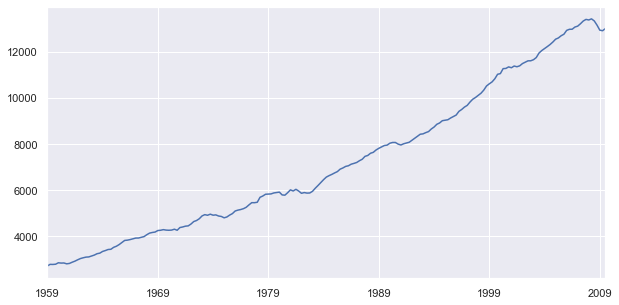

In [80]:
df['realgdp'].plot(figsize = (10,5))

In [81]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [82]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [83]:
type(gdp_trend)

pandas.core.series.Series

<AxesSubplot:>

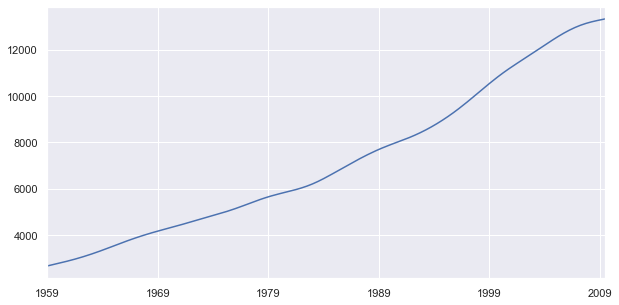

In [84]:
gdp_trend.plot(figsize=(10,5))

In [85]:
df['gdp_trend'] = gdp_trend

In [86]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<AxesSubplot:>

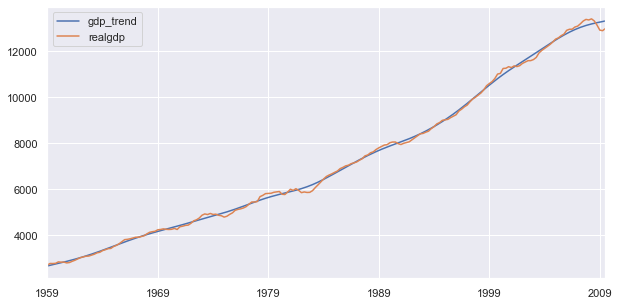

In [87]:
df[['gdp_trend','realgdp']].plot(figsize=(10,5))

<AxesSubplot:>

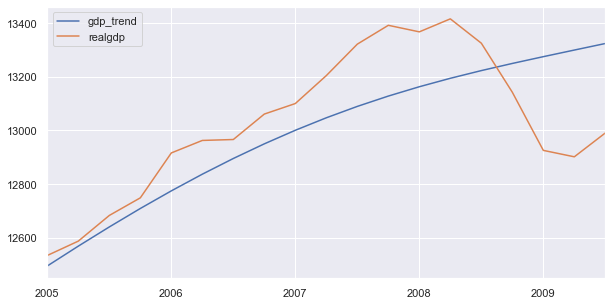

In [88]:
df[['gdp_trend','realgdp']]['2005-01-01':].plot(figsize=(10,5))

In [89]:
airline = pd.read_csv('./Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [90]:
airline = airline.dropna()

airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

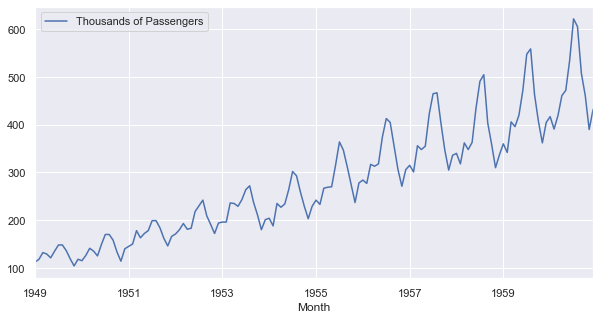

In [91]:

airline.plot(figsize=(10,5))

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [93]:
trend = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

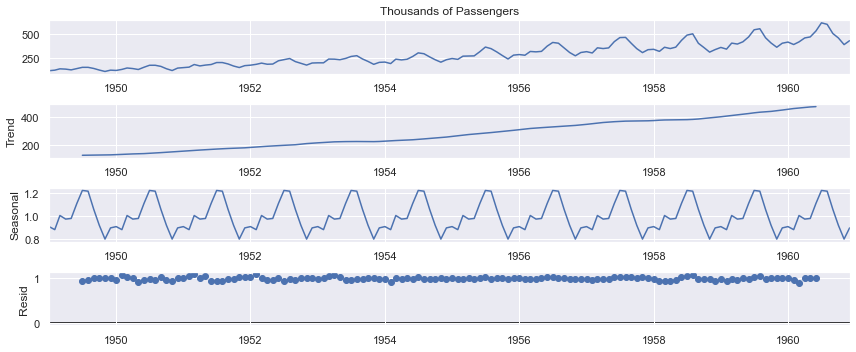

In [94]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

trend.plot();

## 43. EWMA - Exponentially Weighted Moving Average

In [95]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [96]:
airline = pd.read_csv('./Data/airline_passengers.csv',index_col='Month')

In [97]:
airline.dropna(inplace=True)

In [98]:
airline.index = pd.to_datetime(airline.index)

In [99]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [100]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [101]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

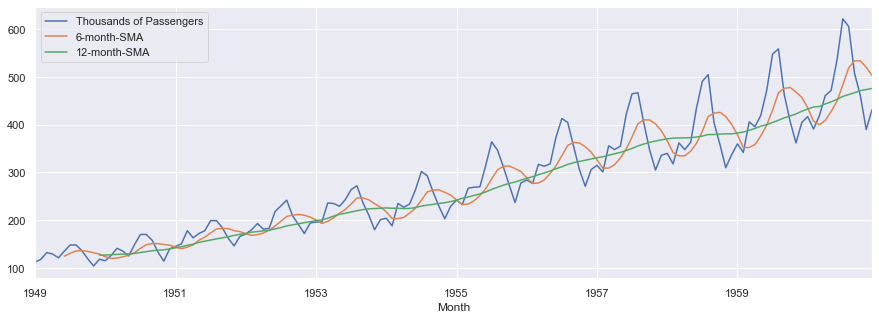

In [105]:
airline.plot(figsize=(15,5))

In [107]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

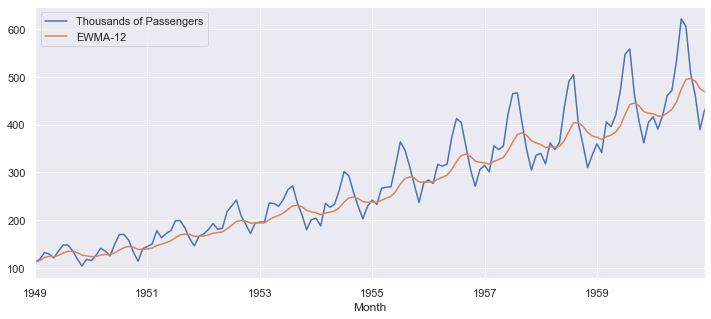

In [110]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(12,5))

## 45. Holt - Winters Methods Code Along

In [119]:
df = pd.read_csv('./Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [120]:
# offset alieases to determine the frequency of the dates

df.index.freq = 'MS'

In [122]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [124]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [149]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [127]:
span = 12
alpha = 2/(span+1)

In [130]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [131]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [139]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [141]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [143]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [144]:
df.head()

,Thousands of Passengers,EWMA-12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [145]:
# df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [150]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:xlabel='Month'>

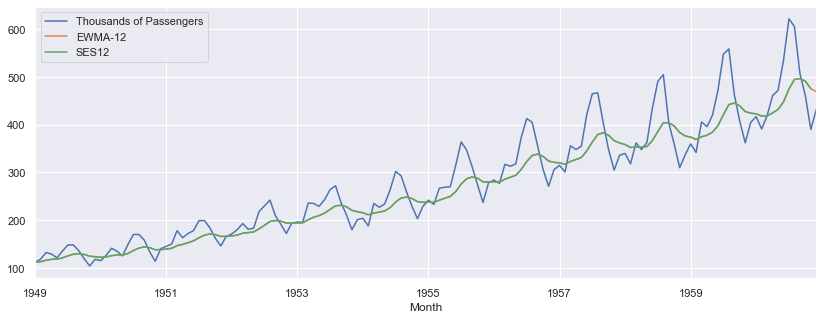

In [147]:
df.plot(figsize=(14,5))

In [163]:
# decide if we should use additive (add) or multiplicative (mul) model. If trend is linear we use additive

df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [164]:
# decide if we should use additive (add) or multiplicative (mul) model. If trend is linear we use additive

df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [165]:
df.head()

,Thousands of Passengers,EWMA-12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237773,112.049247
1949-02-01,118,112.923077,112.923077,120.237773,118.051885
1949-03-01,132,115.857988,115.857988,134.237773,132.058041
1949-04-01,129,117.879836,117.879836,131.237773,129.056722
1949-05-01,121,118.359861,118.359861,123.237773,121.053204


<AxesSubplot:xlabel='Month'>

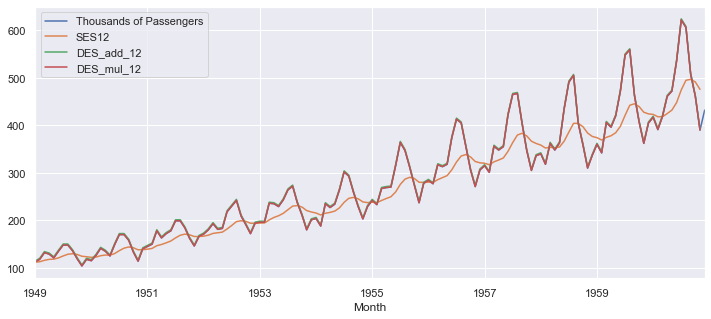

In [166]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].plot()

<AxesSubplot:xlabel='Month'>

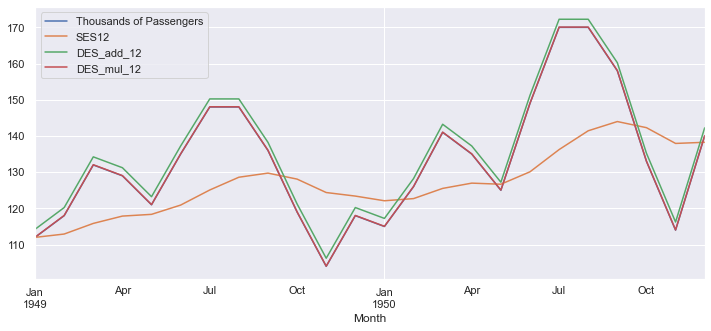

In [167]:
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].iloc[:24].plot()

In [168]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

<AxesSubplot:xlabel='Month'>

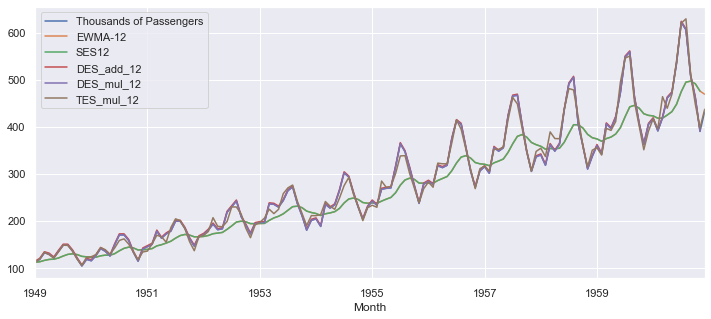

In [171]:
df.plot()

In [172]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

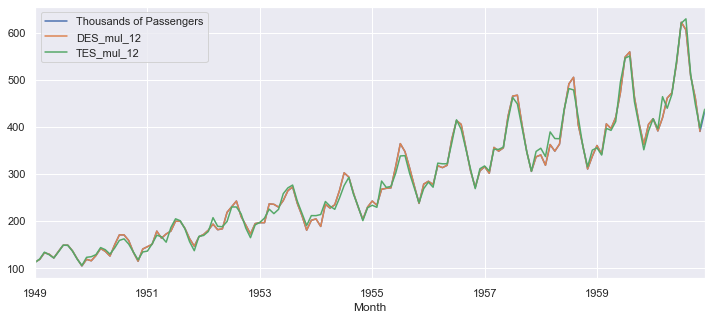

In [174]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].plot()

<AxesSubplot:xlabel='Month'>

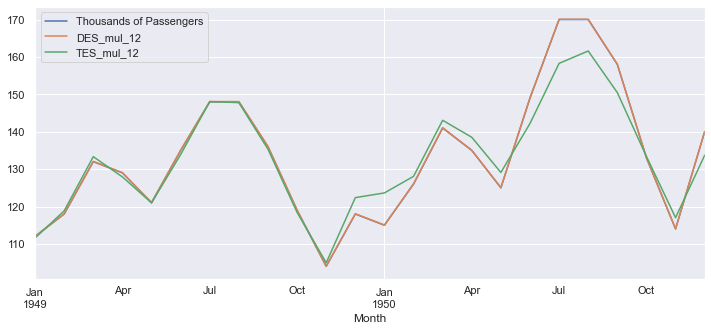

In [175]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot()

<AxesSubplot:xlabel='Month'>

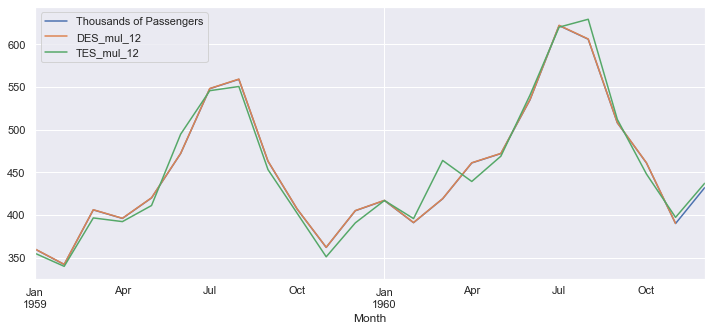

In [176]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot()